In [3]:
import matplotlib, cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#read data set
data1 = cv2.imread('./Data1.png')
data2 = cv2.imread('./Data2.png')

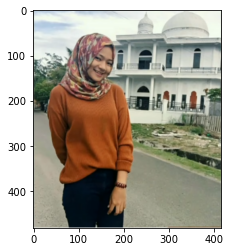

In [5]:
#ouput data set pertama
data1 = cv2.cvtColor(data1, cv2.COLOR_BGR2RGB)
plt.imshow(data1)

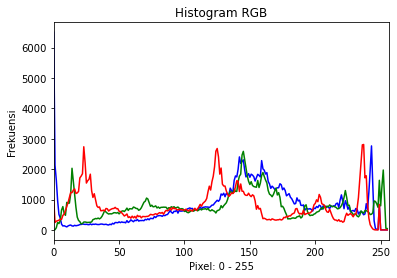

In [6]:
#mencari histogram rgb data pertama
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([data1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title("Histogram RGB")
plt.xlabel('Pixel: 0 - 255')
plt.ylabel('Frekuensi')
plt.show()

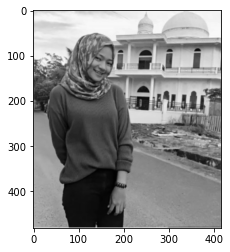

In [7]:
#ubah ke grayscale
gray1 = cv2.cvtColor(data1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap='gray', vmin=0, vmax=255)

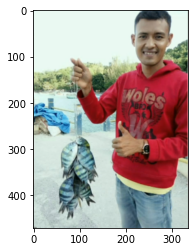

In [8]:
#output data set kedua
data2 = cv2.cvtColor(data2, cv2.COLOR_BGR2RGB)
plt.imshow(data2)

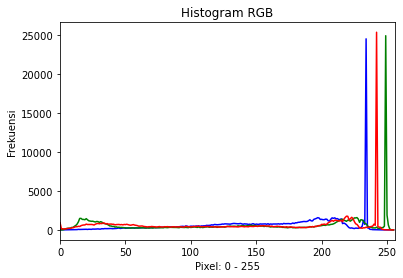

In [9]:
#mencari histogram rgb data kedua
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([data2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title("Histogram RGB")
plt.xlabel('Pixel: 0 - 255')
plt.ylabel('Frekuensi')
plt.show()

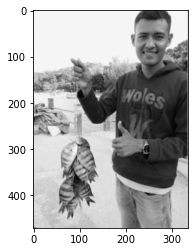

In [10]:
#ubah ke grayscale
gray2 = cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap='gray', vmin=0, vmax=255)